## Preparation of the Data

Create input missing values (coordinates and frames)

Split the data in train and validation sets


In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [242]:
# Import the data
PATH_DATA = "Data_Original/Data_concat_cut.csv"
data = pd.read_csv(PATH_DATA)
data.head()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,rear_v,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status
0,1p_Artur_05122021_chreo1,250,0.0,249.061,196.239,251.496,286.575,168.695,284.129,126.032,...,0.898377,0.947265,0.790894,0.773175,0.647946,0.812466,0.850178,0.733774,basic,S
1,1p_Artur_05122021_chreo1,251,0.0,251.454,193.828,253.934,286.640,171.081,286.549,128.490,...,0.875690,0.921918,0.806627,0.771766,0.630645,0.804178,0.840649,0.729915,basic,NaN
2,1p_Artur_05122021_chreo1,252,0.0,251.543,193.853,256.475,286.643,171.284,286.523,130.914,...,0.882195,0.943283,0.803007,0.774799,0.633506,0.810073,0.833977,0.715198,basic,NaN
3,1p_Artur_05122021_chreo1,253,0.0,251.599,193.823,256.469,289.012,171.270,286.601,130.954,...,0.876877,0.928143,0.802044,0.771636,0.628547,0.823398,0.837598,0.705927,basic,NaN
4,1p_Artur_05122021_chreo1,254,0.0,254.001,193.773,256.494,288.984,173.675,286.574,131.010,...,0.841408,0.914674,0.800491,0.774978,0.627601,0.828413,0.841520,0.700943,basic,NaN


In [243]:
#Add column for the figure ID

ind_start = data[data['status'] == "S"].index.tolist()
ind_end = data[data['status'] == "E"].index.tolist()

def get_id(row_ind):
    l_bound = np.array(ind_start) <= row_ind
    h_bound = np.array(ind_end) >= row_ind
        
    intersect = np.where(l_bound * h_bound)
    return intersect[0][0]

data = data.assign(figure_id=lambda x: x.index)
data['figure_id'] = data['figure_id'].map(lambda row: get_id(row))


In [244]:
data.tail()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
44447,1p_Stef_2_05122021_Choreo1,3708,0.0,196.278,306.630,238.933,349.283,251.569,349.249,268.999,...,0.898602,0.796509,0.799244,0.720383,0.325526,0.323599,0.373564,suzie-q,NaN,479
44448,1p_Stef_2_05122021_Choreo1,3709,0.0,201.309,306.672,243.935,349.281,251.462,346.850,256.488,...,0.937453,0.602083,0.599544,0.725530,0.616891,0.591275,0.367217,suzie-q,NaN,479
44449,1p_Stef_2_05122021_Choreo1,3710,0.0,206.206,306.717,246.470,346.881,249.026,346.807,259.009,...,0.958437,0.708810,0.654566,0.761363,0.845238,0.790193,0.405285,suzie-q,NaN,479
44450,1p_Stef_2_05122021_Choreo1,3711,0.0,208.661,309.062,248.885,346.841,248.887,346.802,253.987,...,0.973175,0.708356,0.714142,0.680468,0.840614,0.726000,0.722980,suzie-q,NaN,479
44451,1p_Stef_2_05122021_Choreo1,3712,0.0,208.699,309.074,249.067,346.829,248.943,346.772,259.013,...,0.973770,0.803625,0.826172,0.803299,0.814626,0.701920,0.751281,suzie-q,E,479


In [245]:
data.columns

Index(['clip_name', 'frame_nr', 'person_id', 'nose_x', 'nose_y', 'neck_x',
       'neck_y', 'rshoulder_x', 'rshoulder_y', 'relbow_x', 'relbow_y',
       'rwrist_x', 'rwrist_y', 'lshoulder_x', 'lshoulder_y', 'lelbow_x',
       'lelbow_y', 'lwrist_x', 'lwrist_y', 'midhip_x', 'midhip_y', 'rhip_x',
       'rhip_y', 'rknee_x', 'rknee_y', 'rankle_x', 'rankle_y', 'lhip_x',
       'lhip_y', 'lknee_x', 'lknee_y', 'lankle_x', 'lankle_y', 'reye_x',
       'reye_y', 'leye_x', 'leye_y', 'rear_x', 'rear_y', 'lear_x', 'lear_y',
       'lbigtoe_x', 'lbigtoe_y', 'lsmalltoe_x', 'lsmalltoe_y', 'lheal_x',
       'lheal_y', 'rbigtoe_x', 'rbigtoe_y', 'rsmalltoe_x', 'rsmalltoe_y',
       'rheal_x', 'rheal_y', 'nose_v', 'neck_v', 'rshoulder_v', 'relbow_v',
       'rwrist_v', 'lshoulder_v', 'lelbow_v', 'lwrist_v', 'midhip_v', 'rhip_v',
       'rknee_v', 'rankle_v', 'lhip_v', 'lknee_v', 'lankle_v', 'reye_v',
       'leye_v', 'rear_v', 'lear_v', 'lbigtoe_v', 'lsmalltoe_v', 'lheal_v',
       'rbigtoe_v', 'rsmallt

In [246]:
# Extract 5 sub sets for every figure

data_b = data.loc[data['label'] == 'basic', :].reset_index(drop=True)
data_s = data.loc[data['label'] == 'side', :].reset_index(drop=True)
data_r = data.loc[data['label'] == 'right-turn', :].reset_index(drop=True)
data_c = data.loc[data['label'] == 'cuban-basic', :].reset_index(drop=True)
data_q = data.loc[data['label'] == 'suzie-q', :].reset_index(drop=True)

In [247]:
data_c

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,1p_Artur_05122021_chreo1,759,0.0,249.043,211.226,236.424,286.560,166.081,276.576,120.976,...,0.851842,0.318418,0.000000,0.187400,0.779005,0.779744,0.537454,cuban-basic,S,6
1,1p_Artur_05122021_chreo1,760,0.0,248.892,211.298,233.989,286.548,166.159,276.579,125.949,...,0.828728,0.238557,0.000000,0.187114,0.787122,0.800840,0.573594,cuban-basic,NaN,6
2,1p_Artur_05122021_chreo1,761,0.0,246.439,211.263,233.916,286.541,166.166,276.551,126.019,...,0.841918,0.206451,0.172404,0.220781,0.775451,0.802431,0.581920,cuban-basic,NaN,6
3,1p_Artur_05122021_chreo1,762,0.0,243.978,208.919,231.504,286.538,166.124,276.578,125.963,...,0.865535,0.102312,0.000000,0.314184,0.772364,0.803984,0.588926,cuban-basic,NaN,6
4,1p_Artur_05122021_chreo1,763,0.0,241.434,208.819,231.312,286.518,163.574,279.091,123.469,...,0.879454,0.332751,0.342306,0.601903,0.764337,0.797000,0.605672,cuban-basic,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,1p_Stef_2_05122021_Choreo1,3535,0.0,0.000,0.000,211.349,349.342,254.057,349.349,286.580,...,0.896388,0.491088,0.559604,0.836254,0.614912,0.612373,0.860626,cuban-basic,NaN,477
8490,1p_Stef_2_05122021_Choreo1,3536,0.0,0.000,0.000,211.343,349.344,254.037,349.367,286.594,...,0.889378,0.478086,0.549290,0.834863,0.606746,0.600384,0.853764,cuban-basic,NaN,477
8491,1p_Stef_2_05122021_Choreo1,3537,0.0,0.000,0.000,211.315,349.358,254.001,349.400,286.591,...,0.900101,0.476371,0.549917,0.843898,0.612489,0.605153,0.852801,cuban-basic,NaN,477
8492,1p_Stef_2_05122021_Choreo1,3538,0.0,0.000,0.000,211.301,349.383,253.984,349.434,286.516,...,0.888552,0.474647,0.546771,0.837624,0.590606,0.580879,0.869726,cuban-basic,NaN,477


In [248]:
# No missing frames in any of the subsets

data_b.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [249]:
data_s.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [250]:
data_r.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [251]:
data_q.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [252]:
data_c.isnull().any()

clip_name      False
frame_nr       False
person_id      False
nose_x         False
nose_y         False
               ...  
rsmalltoe_v    False
rheal_v        False
label          False
status          True
figure_id      False
Length: 81, dtype: bool

In [253]:
check = data_c.loc[ data_c['figure_id'] == 6 ,'lankle_y']

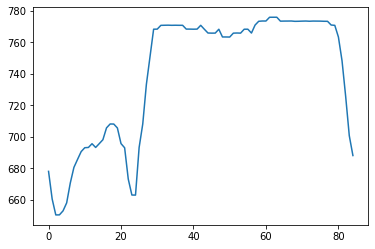

In [254]:
plt.plot(np.array(check).reshape(check.shape[0], 1))

In [255]:
# TODO: Deal with the coordinates that are "0"
# TODO: Decide in normalization of the coordinates

In [256]:
# Shiffling rows with same ID
# TODO, how to specify the seed in the function random.choice?

pd.concat((data_c[data_c['figure_id'] == i] for i in np.random.choice(
                                                         data_c['figure_id'].unique(),
                                                         data_c['figure_id'].nunique())
          ))

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
4434,1p_Dirk_choreo1_04.12.2021,2834,0.0,950.873,213.705,853.219,298.911,883.220,311.513,903.235,...,0.000000,0.095257,0.074985,0.733581,0.085168,0.072939,0.141251,cuban-basic,S,267
4435,1p_Dirk_choreo1_04.12.2021,2835,0.0,950.863,213.715,855.588,298.894,883.212,311.521,905.752,...,0.000000,0.098228,0.078544,0.737257,0.067105,0.057872,0.119675,cuban-basic,NaN,267
4436,1p_Dirk_choreo1_04.12.2021,2836,0.0,950.877,213.724,855.596,296.444,883.168,311.484,898.264,...,0.000000,0.097716,0.076759,0.716784,0.072286,0.062515,0.125844,cuban-basic,NaN,267
4437,1p_Dirk_choreo1_04.12.2021,2837,0.0,960.982,228.651,863.112,291.499,878.213,306.403,910.839,...,0.000000,0.000000,0.000000,0.526778,0.082903,0.076639,0.149548,cuban-basic,NaN,267
4438,1p_Dirk_choreo1_04.12.2021,2838,0.0,963.404,228.653,863.158,291.456,875.718,303.935,910.851,...,0.000000,0.000000,0.000000,0.527568,0.081012,0.074607,0.146507,cuban-basic,NaN,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,1p_Stef_2_05122021_Choreo1,3462,0.0,0.000,0.000,191.196,351.811,233.946,351.921,256.461,...,0.883554,0.460229,0.559616,0.841943,0.650016,0.658141,0.878419,cuban-basic,NaN,476
8417,1p_Stef_2_05122021_Choreo1,3463,0.0,0.000,0.000,188.723,351.860,231.400,351.957,251.567,...,0.900530,0.536627,0.666899,0.815071,0.615984,0.622817,0.873944,cuban-basic,NaN,476
8418,1p_Stef_2_05122021_Choreo1,3464,0.0,0.000,0.000,186.152,351.847,228.898,351.912,249.060,...,0.879943,0.564930,0.658259,0.836534,0.616513,0.626954,0.879852,cuban-basic,NaN,476
8419,1p_Stef_2_05122021_Choreo1,3465,0.0,0.000,0.000,176.241,351.937,226.301,354.355,246.413,...,0.849837,0.517812,0.602002,0.830736,0.634845,0.643200,0.887729,cuban-basic,NaN,476


In [257]:
data_b = pd.concat((data_b[data_b['figure_id'] == i] for i in np.random.choice(
                                                         data_b['figure_id'].unique(),
                                                         data_b['figure_id'].nunique())
          )).reset_index(drop=True)
data_c = pd.concat((data_c[data_c['figure_id'] == i] for i in np.random.choice(
                                                         data_c['figure_id'].unique(),
                                                         data_c['figure_id'].nunique())
          )).reset_index(drop=True)
data_r = pd.concat((data_r[data_r['figure_id'] == i] for i in np.random.choice(
                                                         data_r['figure_id'].unique(),
                                                         data_r['figure_id'].nunique())
          )).reset_index(drop=True)
data_s = pd.concat((data_s[data_s['figure_id'] == i] for i in np.random.choice(
                                                         data_s['figure_id'].unique(),
                                                         data_s['figure_id'].nunique())
          )).reset_index(drop=True)
data_q = pd.concat((data_q[data_q['figure_id'] == i] for i in np.random.choice(
                                                         data_q['figure_id'].unique(),
                                                         data_q['figure_id'].nunique())
          )).reset_index(drop=True)

In [258]:
# Checking number of figures and for average number of frames
# TODO why the splitting does not give always the same numbers
ind = data_b.columns.get_loc("label")
n = data_b['figure_id'].unique().shape[0]
print(f'Number of frames {data_b.iloc[0, ind]} is {data_b.shape[0]/n}')
print(f'Number of instances is {n}')

ind = data_c.columns.get_loc("label")
n = data_c['figure_id'].unique().shape[0]
print(f'Number of frames {data_c.iloc[0, ind]} is {data_c.shape[0]/n}')
print(f'Number of instances is {n}')

ind = data_r.columns.get_loc("label")
n = data_r['figure_id'].unique().shape[0]
print(f'Number of frames {data_r.iloc[0, ind]} is {data_r.shape[0]/n}')
print(f'Number of instances is {n}')

ind = data_b.columns.get_loc("label")
n = data_b['figure_id'].unique().shape[0]
print(f'Number of frames {data_b.iloc[0, ind]} is {data_b.shape[0]/n}')
print(f'Number of instances is {n}')

ind = data_s.columns.get_loc("label")
n = data_s['figure_id'].unique().shape[0]
print(f'Number of frames {data_b.iloc[0, ind]} is {data_b.shape[0]/n}')
print(f'Number of instances is {n}')



Number of frames basic is 164.27868852459017
Number of instances is 61
Number of frames cuban-basic is 127.31818181818181
Number of instances is 66
Number of frames right-turn is 146.7258064516129
Number of instances is 62
Number of frames basic is 164.27868852459017
Number of instances is 61
Number of frames basic is 161.6290322580645
Number of instances is 62


In [260]:
# Splitting every set

def get_split_index(ind_list):
    
    split_at = np.floor(0.8 * len(ind_list)).astype(int)
    s_index = ind_list[split_at]
    
    return s_index


In [265]:
end_b = data_b[data_b['status'] == "E"].index.tolist()
end_s = data_s[data_s['status'] == "E"].index.tolist()
end_q = data_q[data_q['status'] == "E"].index.tolist()
end_c = data_c[data_c['status'] == "E"].index.tolist()
end_r = data_r[data_r['status'] == "E"].index.tolist()

train_set = pd.concat([
    data_b.loc[0:get_split_index(end_b), :],
    data_s.loc[0:get_split_index(end_s), :],
    data_q.loc[0:get_split_index(end_q), :],
    data_c.loc[0:get_split_index(end_c), :],
    data_r.loc[0:get_split_index(end_r), :]
]).reset_index(drop=True)

val_set = pd.concat([
    data_b.loc[get_split_index(end_b) + 1 :, :],
    data_s.loc[get_split_index(end_s) + 1 :, :],
    data_q.loc[get_split_index(end_q) + 1 :, :],
    data_c.loc[get_split_index(end_c) + 1 :, :],
    data_r.loc[get_split_index(end_r) + 1 :, :]
]).reset_index(drop=True)




In [267]:
train_set.tail()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
35438,1p_Eero_4_05122021_choreo1,2419,0.0,334.384,296.616,281.582,339.327,271.664,331.910,286.599,...,0.0,0.558826,0.546012,0.505058,0.708320,0.719442,0.776601,right-turn,NaN,142
35439,1p_Eero_4_05122021_choreo1,2420,0.0,336.837,296.711,289.005,344.262,274.154,334.268,304.118,...,0.0,0.742398,0.705593,0.624336,0.730229,0.714040,0.782541,right-turn,NaN,142
35440,1p_Eero_4_05122021_choreo1,2421,0.0,341.852,294.220,289.074,344.309,284.065,339.273,311.730,...,0.0,0.735757,0.735893,0.727218,0.763673,0.744302,0.792336,right-turn,NaN,142
35441,1p_Eero_4_05122021_choreo1,2422,0.0,344.370,294.218,291.592,344.275,289.075,339.294,324.285,...,0.0,0.754907,0.780599,0.734114,0.762639,0.735815,0.783641,right-turn,NaN,142
35442,1p_Eero_4_05122021_choreo1,2423,0.0,346.840,294.171,291.688,339.362,289.222,336.809,331.834,...,0.0,0.732484,0.722833,0.755574,0.768175,0.749625,0.797101,right-turn,E,142


In [269]:
val_set.head()

,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,relbow_x,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,1p_Eero_1_05122021_choreo1,1116,0.0,208.698,289.165,216.325,351.950,168.739,351.992,151.219,...,0.971746,0.784963,0.860478,0.602624,0.156422,0.174537,0.239260,basic,S,90
1,1p_Eero_1_05122021_choreo1,1117,0.0,208.703,289.073,216.324,351.886,168.737,351.933,151.141,...,0.980831,0.789590,0.853736,0.589184,0.137738,0.000000,0.253628,basic,NaN,90
2,1p_Eero_1_05122021_choreo1,1118,0.0,208.706,286.644,216.335,351.848,168.726,351.883,151.116,...,0.983542,0.771334,0.836962,0.540966,0.185308,0.141367,0.282748,basic,NaN,90
3,1p_Eero_1_05122021_choreo1,1119,0.0,208.673,286.525,216.309,351.795,168.703,351.839,151.145,...,0.963040,0.779887,0.853862,0.579853,0.160778,0.000000,0.381760,basic,NaN,90
4,1p_Eero_1_05122021_choreo1,1120,0.0,206.296,284.080,216.303,351.750,168.684,351.790,151.094,...,0.946707,0.797483,0.878832,0.569365,0.160640,0.000000,0.340040,basic,NaN,90


In [270]:
train_set.to_csv("Data_train_validate/Data_train.csv")
val_set.to_csv("Data_train_validate/Data_val.csv")